[link text](https://)# Forest Fires Predictor
## Using Linear Regression

In [129]:
# Importing Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle 
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [130]:
# Using pandas to find attributes
#Loads the data from forestfires.csv
data = pd.read_csv("forestfires.csv", sep = ",")
#Prints the first few lines of data from forest fires 
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [131]:
#Shows only these specific columns of the data
data = data[["FFMC", "DMC", "DC", "ISI","temp", "wind", "area"]]
#Prints out only these columns of data
print(data.head())

   FFMC   DMC     DC  ISI  temp  wind  area
0  86.2  26.2   94.3  5.1   8.2   6.7   0.0
1  90.6  35.4  669.1  6.7  18.0   0.9   0.0
2  90.6  43.7  686.9  6.7  14.6   1.3   0.0
3  91.7  33.3   77.5  9.0   8.3   4.0   0.0
4  89.3  51.3  102.2  9.6  11.4   1.8   0.0


In [132]:
# Predicts the target variable
predict = "FFMC"
# Set "FFMC" as the column you want to predict

x = np.array(data.drop(predict, axis=1))
# Create an array "x" with all columns except "FFMC" (the features)

y = np.array(data[predict])
# Create an array "y" with only the "FFMC" column (the target)

In [133]:
# Split into train and test
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [134]:
# Linear equation y = mx + b 
linear = linear_model.LinearRegression()
# Create a linear regression model (y = mx + b)

# Define the line of best fit
linear.fit(x_train, y_train)
# Train the model using the training data (x_train, y_train) to find the best fit line

acc = linear.score(x_test, y_test)
# Calculate how well the model predicts (accuracy score) using the test data

print(acc)
# Print the accuracy of the model


0.19875862660047405


In [135]:
with open("forestfires.xlsx", "wb") as f:
    pickle.dump(linear, f)
# Save the trained linear model into a file called "forestfires.xlsx" using pickle

# Load the pickle file
pickle_in = open("forestfires.xlsx", "rb")
linear = pickle.load(pickle_in)
# Load the saved linear model from the "forestfires.xlsx" file

print('Coefficient: \n', linear.coef_)
# Print out the coefficients (slopes) of the linear model

print('Intercept: \n', linear.intercept_)
# Print out the intercept (where the line crosses the y-axis) of the model

predictions = linear.predict(x_test)
# Use the linear model to make predictions on the test data

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])
# Loop through the predictions and print each one alongside its corresponding test data and actual value


Coefficient: 
 [ 0.01233428  0.00060593  0.46504041  0.11579385 -0.25092795  0.00049185]
Intercept: 
 83.69446923253162
91.20423740067959 [130.1  807.1    7.5   21.3    2.2   28.19] 91.5
91.03704006161398 [102.3  751.5    8.4   23.5    4.     3.33] 92.2
89.1069611361538 [108.4 764.    6.2  18.    5.4   0. ] 91.6
92.31636551708834 [122.   789.7   10.2   21.1    2.2    8.12] 92.5
91.68241004170669 [142.4 601.4  10.6  19.8   5.4   0. ] 91.4
89.5201657069041 [166.9 752.6   7.1  18.5   8.5   0. ] 91.0
94.16189970293294 [152.6 658.2  14.3  19.1   2.7   4.4] 92.1
83.83935669665665 [ 25.4  349.7    2.6    4.6    8.5   22.03] 85.4
89.96618490705467 [ 99.6 631.2   6.3  20.8   2.7   0. ] 90.2
93.01593408050007 [101.3  423.4   14.7   18.2    4.5    2.21] 93.7
92.47723070073413 [164.1  575.8    8.9   26.3    3.1    7.02] 92.7
90.04813220179346 [166.9  752.6    7.1   21.1    7.6    2.17] 91.0
95.05232955692128 [108.3  647.1   17.    24.6    4.5   10.01] 94.8
88.22543474063167 [ 56.7  665.6    1.9   

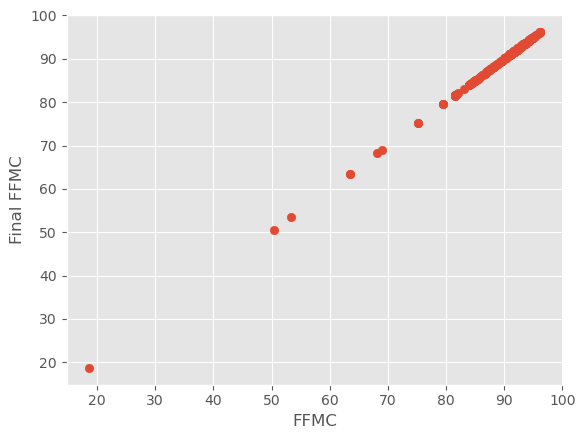

In [136]:
style.use("ggplot")
# Apply the "ggplot" style to make the plot look nice and clean

# Set up a scatter plot
p = "FFMC"
# Choose the "FFMC" column to be used on the x-axis

pyplot.scatter(data[p], data["FFMC"])
# Create a scatter plot with "FFMC" values on both the x-axis and y-axis

pyplot.xlabel(p)
# Label the x-axis with the column name "FFMC"

pyplot.ylabel("Final FFMC")
# Label the y-axis as "Final FFMC" to represent the data

pyplot.show()
# Display the scatter plot on the screen